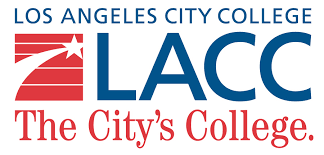

#Hypothesis Testing for Population Proportion
#Created by Professor: Edward Pineda-Castro
#Los Angeles City College

# <center>The Language of Hypothesis Testing</center></center>


**Example 1:**  For the following problems, determine the null and alternative hypotheses.

**(a)**  In 2007, the standard deviation SAT score on the Reasoning Test for all students taking the exam was 113.  A teacher believes that, due to changes in high school curricula, the standard deviation of SAT math scores has decreased.





**Enter your answer here:**

**(b)**  According to a certain magazine, the mean charitable contribution per household in the U.S. in 2000 was $1,623.  A researcher believes that the level of giving has changed since then.







**Enter your answer here:**

**(c)**  According to the Centers for Disease Control and Prevention, 16% of children aged 6 to 11 years are overweight.  A school nurse thinks that the percentage of 6 to 11-year-olds who are overweight is higher in her school district.

**Enter your answer here:**

#Explain Type I and Type II Errors

**Example 2:**  The mean score on the SAT Math Reasoning exam is 518.  A test preparation company states that the mean score of students who take its course is higher than 518.

**(a)**  Determine the null and alternative hypotheses.


**Enter your answer here:**



**(b)**  If the sample indicates that the null hypothesis should not be rejected, state the conclusion of the company.



**Enter your answer here:**




**(c)**  Suppose that the mean score of all students taking the preparatory course is 522.  Has a Type I or Type II been made?  If we tested the hypothesis at the α=0.01 level, what is the probability of committing a Type I error?



**Enter your answer here:**

**Practice 1:**  According to the Centers for Disease Control, 15.2% of American adults experience migraine headaches.  Stress is a major contributor to the frequency and intensity of headaches.  A massage therapist feels that she has a technique that can reduce the frequency of migraine headaches.

**(a)**  Determine the null and alternative hypothesis that would be used to test the effectiveness of the massage therapist’s techniques.


**Enter your answer here:**




**(b)**  If sample data indicate that the null hypothesis should be rejected, state the conclusion of the therapist.




**Enter your answer here:**




**(c)**  Suppose that the percentage of all patients in the program who experience migraine headaches is 15.3%.  Was a Type I or Type II error committed? If we tested the hypothesis at the α=0.05 level, what is the probability of committing a Type II error?

 **Enter your answer here:**



#Classical and P-value Method of Hypothesis Testing Regarding a Population Proportion

**Example 1:**  In a survey conducted by the Gallup Organization in October of 2013, 320 of 500 teenagers said that they favor life imprisonment instead of the death penalty.  Suppose that we read that 47% of teenagers prefer life imprisonment. Is there significant evidence to support the claim that a higher proportion of teenagers today support life imprisonment at the α=0.05 level of significance?

**Condition:**


**np(1-p)≥10 is true**


**1. State the Hypothesis:**


**Ho:p=.47 vs H1:p>.47**



In [ ]:
p=.47
n=500
condition=n*p*(1-p)
print(condition)

124.55000000000001


**2. The test statistics:**




In [ ]:
import math
p=.47
x= 320
n= 500

phat = x/n


z = (phat - p)/math.sqrt(p*(1-p)/n)
print("Phat:",phat)
print("The test statistics:",z)


Phat: 0.64
The test statistics: 7.616352919505509


**3. Classical Method:**






In [ ]:
from scipy.stats import norm

norm.ppf(1-.10)

1.2815515655446004


**4. P_value Method:**








In [ ]:
from scipy.stats import norm
1-norm.cdf(7.616)

1.3100631690576847e-14

**5. Conclusion:**

**There is enough evidence to support the claim that  a higher proportion of teenagers today support life imprisonment at the α=0.05 level of significance.**

**Example 2:**  In 2000, 58% of adult females lived alone, according to the U.S. Census Bureau.  A sociologist tests whether this percentage is different today by conducting a random sample of 500 adult females and finds that 285 are living alone. Is there sufficient evidence at the α=0.10 level of significance to conclude that the proportion has changed since 200

**1. State the Hypothesis:**


**Ho:p=.58 vs H1:p$\neq$.58**

**2. The test statistics:**

In [ ]:
import math

x= 285
n= 500
p = .58

phat = x/n

z = (phat - p)/math.sqrt(p*(1-p)/n)

print(z)

-0.45305023518296905


**3. Classical Method:**

In [ ]:
from scipy.stats import norm

l=norm.ppf(.05)
r=norm.ppf(1-.05)

print("(",l,r,")")

( -1.6448536269514729 1.6448536269514722 )


**4. P_value Method:**

In [ ]:
2*norm.cdf(-0.453)

0.6505487415198842

**5. Conclusion:**

**There is not enough evidence to support the claim that percentage of woman living alone is different today**




**Practice 1:**  In August 2003, 56% of employed adults in the U.S. reported that basic mathematical skills were critical to their jobs.  The supervisor of the job placement office at a college thinks this percentage has decreased due to the use of technology in the workplace.  He takes a random sample of 480 employed adults and finds that 297 of them feel that basic mathematical skills are critical to their jobs.  Is there sufficient evidence to conclude that the percentage of employed adults who feel basic mathematical skills are critical to their job has decreased at the α=0.05 level of significance?

**1.State the Hypothesis:**

**Ho:p=.56 vs H1:p<.56**

**2. The test statistics:**

In [ ]:
import math

x= 297
n= 480
p = .56

phat = x/n

z = (phat - p)/math.sqrt(p*(1-p)/n)

print(z)

2.5930335616702003


**3. Classical Method:**

In [ ]:
from scipy.stats import norm

l=norm.ppf(.05)

print(l)

-1.6448536269514729


**4. P_value Method:**

In [ ]:
norm.cdf(2.593)

0.9952428614706055

**5. Conclusion:**

**There is not enough evidence to support the claim that basic mathematics skill has decrease due to technology.**

# <center>Hypothesis Test Function for Proportion</center>

In [ ]:
import math
from scipy.stats import norm

def hypothesis_test_proportion(x, n, p_null, alpha, tails="two", decimal_places=2):
    # Calculate p_hat
    p_hat = x / n

    # Calculate the test statistic
    se = math.sqrt(p_null * (1 - p_null) / n)
    z = (p_hat - p_null) / se

    # Calculate the critical values and p-value based on the tail
    if tails == "left":
        crit_val = -abs(norm.ppf(alpha, loc=0, scale=1))
        p_val = norm.cdf(z)
        if z < crit_val:
            conclusion = "Reject the null hypothesis"
        else:
            conclusion = "Do not reject the null hypothesis"
    elif tails == "right":
        crit_val = abs(norm.ppf(alpha, loc=0, scale=1))
        p_val = 1 - norm.cdf(z)
        if z > crit_val:
            conclusion = "Reject the null hypothesis"
        else:
            conclusion = "Do not reject the null hypothesis"
    else:
        crit_val_left = -abs(norm.ppf(alpha / 2, loc=0, scale=1))
        crit_val_right = abs(norm.ppf(alpha / 2, loc=0, scale=1))
        p_val = 2 * (1 - norm.cdf(abs(z)))
        if abs(z) > crit_val_right or abs(z) < crit_val_left:
            conclusion = "Reject the null hypothesis"
        else:
            conclusion = "Do not reject the null hypothesis"

    # Print the results
    z = round(z, decimal_places)
    p_val = round(p_val, decimal_places)
    if tails == "two":
        crit_val_left = round(crit_val_left, decimal_places)
        crit_val_right = round(crit_val_right, decimal_places)
        print("Critical values: {}, {}".format(crit_val_left, crit_val_right))
    else:
        crit_val = round(crit_val, decimal_places)
        print("Critical value: {}".format(crit_val))

    print("Test statistic: {}".format(z))
    print("P-value: {}".format(p_val))
    print("Conclusion: {}".format(conclusion))


#Enter your values into the function:

In [ ]:

# "left" for one-tailed left, "right" for one-tailed right, "two" for two-tailed
hypothesis_test_proportion(x=30, n=329, p_null=0.12, alpha=0.10, tails="left", decimal_places=4)

Critical value: -1.2816
Test statistic: -1.6083
P-value: 0.0539
Conclusion: Reject the null hypothesis


In [ ]:
329*.12*(1-.12)

34.742399999999996